<a href="https://colab.research.google.com/github/pradeep6296/ANN-Model/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get rid of harmless warnings
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# deeplearning libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Import the data

# Training data
x_train = np.loadtxt('/content/drive/MyDrive/DATA Deep Learning/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/DATA Deep Learning/labels.csv', delimiter=',')

# Testing data
x_test = np.loadtxt('/content/drive/MyDrive/DATA Deep Learning/input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/DATA Deep Learning/labels_test.csv', delimiter=',')

In [ ]:
# Dimension of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [ ]:
# pixel values
print('Minimum pixel value:', x_train.min())
print('Maximum pixel value:', x_train.max())

Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [ ]:
# size per image = 100px x 100px
# gradient = RGB = 3 layers

# 100px x 100px x 3 = 30000 columns

In [ ]:
# reshape the training data
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
# reshape the testing data
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)
# scale the data
x_train = x_train/255.0
x_test = x_test/255.0

# Dimension of the data
print('Dimension of the data after reshaping')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Dimension of the data after reshaping
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


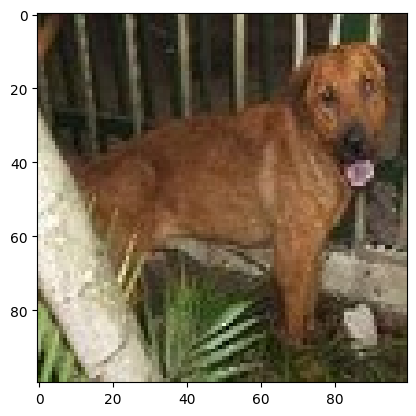

The label of the image is [0.]


In [ ]:
# printing the first training image
plt.imshow(x_train[0])
plt.show()
print('The label of the image is', y_train[0])

In [ ]:
# Conventional way
model = Sequential([
    # First conv layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    # Second conv layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flattening layer
    Flatten(),

    # First Dense layer
    Dense(70, activation='relu'),
    # Output Layer
    Dense(1, activation='sigmoid')
])

In [ ]:
 #compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# trainig the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5078 - loss: 0.7905
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5921 - loss: 0.6690
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6579 - loss: 0.6166
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7046 - loss: 0.5657
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7698 - loss: 0.4775


In [ ]:
# evaluate
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6578 - loss: 0.6150


[0.5967726111412048, 0.6775000095367432]

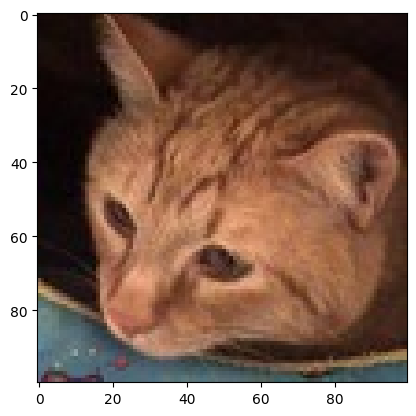

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model Prediction Probability: [[0.51257706]]
The actual image is: Cat
The model has predicted as: Cat


In [ ]:
# predictions
rdm_img = random.randint(0, len(y_test))
plt.imshow(x_test[rdm_img])
plt.show()

# actual condition
if y_test[rdm_img] == 1:
    actual = 'Cat'
else:
    actual = 'Dog'

# prediction for the random image
y_pred = model.predict(x_test[rdm_img].reshape(1, 100, 100, 3))
print('Model Prediction Probability:', y_pred)

if y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'

print('The actual image is:', actual)
print('The model has predicted as:', pred)